# Final Project - Basics of deep learning
Hello dear students,<br> This is the template notebook. Please copy it into your drive.

---
<br>

### Name and ID:
Student 1: Ofir Gur Cohen 2065885642
<br>
Student 2: Oz Gemer 208426460

##import libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset,Subset
import torchvision
import torchvision.transforms as transforms
from sklearn.model_selection import train_test_split
from torchvision import datasets, transforms, models
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn.metrics import f1_score,precision_score,recall_score
from tqdm import tqdm
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cuda


In [ ]:
!pip install -U --no-cache-dir gdown --pre
!gdown --id 1Q2ukYdKNxZCUn_5cClLsxJtg5R0O-Mzt # download explainer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: gdown
    Found existing installation: gdown 4.4.0
    Uninstalling gdown-4.4.0:
      Successfully uninstalled gdown-4.4.0
/usr/local/lib/python3.9/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1Q2ukYdKNxZCUn_5cClLsxJtg5R0O-Mzt
To: /content/Explainer.md
100% 1.41k/1.41k [00:00<00:00, 2.35MB/s]


## Transformations

In [ ]:
transform_train = transforms.Compose([
    transforms.Resize((224, 224,)),
    #transforms.RandomRotation(30),
    transforms.ToTensor(),
    transforms.RandomHorizontalFlip(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((224, 224,)),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

## Functions

In [ ]:
def predict(test_loader):
    res = []
    for i, (image, label) in enumerate(test_loader):
      image = image.to(device)
      output = net(image)
      output = output.detach().cpu().numpy().reshape(-1, np.prod(output.size()[1:]))
      _, neighbors_idx = knn.kneighbors(output)

      for j in range(len(label)):
        res.append((image[j], neighbors_idx[j]))
    return res


In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
def plot_result(query_image, candidates_idx, label):
  plt.figure(figsize=(3,3))
  # show query image
  plt.imshow(query_image.cpu().detach().permute(1,2,0))
  plt.suptitle(label)
  image = np.asarray(query_image.cpu().detach())
  image = np.asarray(image)
  columns = k
  fig = plt.figure(figsize=(10, 10))
  ax = []
  for i, idx in enumerate(candidates_idx):
      image = np.asarray(trainset[idx][0].cpu().detach().permute(1,2,0))
      ax.append(fig.add_subplot(1, columns, i+1) )
      ax[-1].set_title(trainset[idx][1])
      plt.imshow(image)
  plt.show()

In [ ]:
def majority(candidates):
  votes = {}
  max = 0
  choice = None
  for candidate_idx in candidates:
    candidate_label = trainset[candidate_idx][1]
    if candidate_label not in votes:
      votes[candidate_label] = 0
    votes[candidate_label] += 1
    if votes[candidate_label] > max:
      max = votes[candidate_label]
      choice = candidate_label
  return choice

In [ ]:
def get_candidates_and_labels():
  candidates = []
  labels = []
  for batch, (image, label) in enumerate(dataloader_train):
    image = image.to(device)
    output = net(image)
    output = output.detach().cpu().numpy().reshape(-1, np.prod(output.size()[1:]))
    candidates.append(output)
    labels.append(label)

  candidates = np.concatenate(candidates)
  labels = np.concatenate(labels)
  return candidates,labels

In [ ]:
def plot_bar_chart(data,labels):

  fig = plt.figure(figsize = (10, 5))
  plt.bar(labels, data, color ='maroon',
        width = 0.4)
plt.show()

In [ ]:
def predict_one(img,net,knn_model):
  image = img.to(device)
  output = net(image)
  # print(output)
  output = output.detach().cpu().numpy().reshape(-1, np.prod(output.size()[1:]))
  # print(output)
  _, neighbors_idx = knn_model.kneighbors(output)
  # print(neighbors_idx)
  return print("predicted: ",majority(neighbors_idx[0]))


In [ ]:
def run_test():
  results = [0] * 197
  labels = [x for x in range(197)]
  y_pred = []
  y_true = []
  correct = 0
  for batch, (image, label) in enumerate(dataloader_test):
    for i in range(len(image)):
      test_image, candidates_idx = res[batch*batch_size + i]
      choice = majority(candidates_idx)
      y_pred.append(choice)
      y_true.append(label[i].item())
      if label[i].item() is choice:
        correct += 1
        results[choice] += 1

  acc = correct/len(testset)
  results.pop(0)
  labels.pop(0)
  plot_bar_chart(results,labels)
  print("Test acc:" , acc)
  return y_pred,y_true

##Dataset

Cars196 - 196 different classes of vehicles

In [ ]:
trainset = torchvision.datasets.StanfordCars(root='./data', split='train', download=True, transform=transform_train)
testset = torchvision.datasets.StanfordCars(root='./data', split='test', download=True, transform=transform_test)

  0%|          | 0/330960 [00:00<?, ?it/s]

Extracting data/stanford_cars/car_devkit.tgz to data/stanford_cars


  0%|          | 0/979269282 [00:00<?, ?it/s]

Extracting data/stanford_cars/cars_train.tgz to data/stanford_cars
Using downloaded and verified file: data/stanford_cars/car_devkit.tgz
Extracting data/stanford_cars/car_devkit.tgz to data/stanford_cars


  0%|          | 0/977350468 [00:00<?, ?it/s]

Extracting data/stanford_cars/cars_test.tgz to data/stanford_cars


  0%|          | 0/185758 [00:00<?, ?it/s]

In [ ]:
print(len(trainset), len(testset))

8144 8041


creating dataloaders to iterate over the dataset

In [ ]:
classes = trainset.classes
batch_size = 32
dataloader_train = torch.utils.data.DataLoader(trainset, batch_size = batch_size, shuffle = False)
dataloader_test = torch.utils.data.DataLoader(testset, batch_size = batch_size, shuffle = False)

# Experiment 1 - resnet

##Load pre-trained ResNet Model

In [ ]:
%%script echo skipping
from torchvision import models
# Use pretrained ResNet model
# net = models.resnet50(pretrained=True)
net = models.resnext50_32x4d(pretrained=True)
# Create a new network without the fully connected layers
net = torch.nn.Sequential(*(list(net.children())[:-1]))
net = net.to(device)

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNeXt50_32X4D_Weights.IMAGENET1K_V1`. You can also use `weights=ResNeXt50_32X4D_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnext50_32x4d-7cdf4587.pth" to /root/.cache/torch/hub/checkpoints/resnext50_32x4d-7cdf4587.pth


  0%|          | 0.00/95.8M [00:00<?, ?B/s]

##Calculate the features for the trainset

In [ ]:
%%script echo skipping
candidates,labels = get_candidates_and_labels()

##Fit the trainset using knn

In [ ]:
%%script echo skipping
k = 5
knn = NearestNeighbors(n_neighbors=k, metric="cosine")
knn.fit(candidates)

NearestNeighbors(metric='cosine')

In [ ]:
%%script echo skipping
print(len(testset))

8041


In [ ]:
%%script echo skipping
res = predict(dataloader_test)

## print example

2914
[5868 7889 7513 6704 4283]


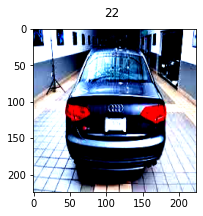

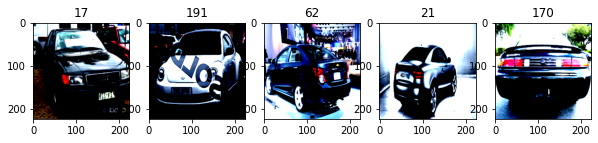

In [ ]:
%%script echo skipping
rnd_idx = random.randrange(len(testset))
print(rnd_idx)
test_image_1, candidates_idx = res[rnd_idx]
print(candidates_idx)
plot_result(test_image_1, candidates_idx, testset[rnd_idx][1])

## Run test

Test acc: 0.24922273349085936


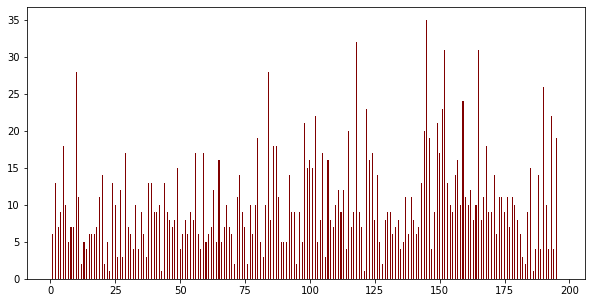

In [ ]:
%%script echo skipping
y_pred, y_true = run_test()

### f1 score

In [ ]:
%%script echo skipping
f1_score(y_true, y_pred, average='macro')

0.24784344130570207

### Recall score

In [ ]:
%%script echo skipping
recall_score(y_true, y_pred, average='macro')

0.25196500449518516

### Precision score

In [ ]:
%%script echo skipping
precision_score(y_true, y_pred, average='macro')

0.2536126524890128

# Experiment 2 - VGG16

In [ ]:
%%script echo skipping
net = models.vgg16(pretrained=True)
# Create a new network without the fully connected layers
net = torch.nn.Sequential(*(list(net.children())[:-1]))
net = net.to(device)

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth


  0%|          | 0.00/528M [00:00<?, ?B/s]

## Calculate the features for the trainset

In [ ]:
%%script echo skipping
candidates,labels = get_candidates_and_labels()

##Fit the trainset using knn

In [ ]:
%%script echo skipping
k = 5
knn = NearestNeighbors(n_neighbors=k, metric="cosine")
knn.fit(candidates)

NearestNeighbors(metric='cosine')

In [ ]:
%%script echo skipping
res = predict(dataloader_test)

## Print example

4784
[4177 7345  786 3010 3873]


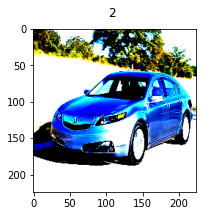

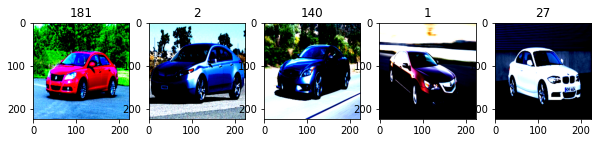

In [ ]:
%%script echo skipping
rnd_idx = random.randrange(len(testset))
print(rnd_idx)
test_image_1, candidates_idx = res[rnd_idx]
print(candidates_idx)
plot_result(test_image_1, candidates_idx, testset[rnd_idx][1])

## Run test

Test acc: 0.19114537992786967


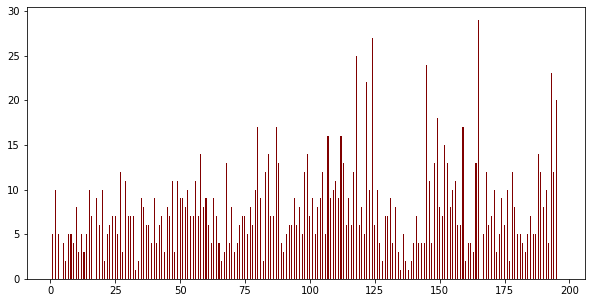

In [ ]:
%%script echo skipping
y_pred, y_true = run_test()

### F1 score

In [ ]:
%%script echo skipping
f1_score(y_true, y_pred, average='macro')

0.19773199240009057

### Precision score

In [ ]:
%%script echo skipping
precision_score(y_true, y_pred, average='macro')

0.22176086583508825

### Recall score

In [ ]:
%%script echo skipping
recall_score(y_true, y_pred, average='macro')

0.1912415141372983

# Experiment 3 - transfer learning network as base

In [ ]:
# drive.mount('/content/gdrive', force_remount = True)
!pip install --upgrade --no-cache-dir gdown
!gdown --id 1Rd3m40JgweV2Bm1TpJsebHFgFDApFfdD
# https://drive.google.com/file/d/1Rd3m40JgweV2Bm1TpJsebHFgFDApFfdD/view?usp=share_link
net = models.resnet152(pretrained=True)
classifier = nn.Sequential()
classifier.add_module('fc0', nn.Linear(2048, 196))
net.fc = classifier
net.load_state_dict(torch.load('resnet'))
net.eval()
net.cuda()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
/usr/local/lib/python3.9/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1Rd3m40JgweV2Bm1TpJsebHFgFDApFfdD
To: /content/resnet
100% 235M/235M [00:01<00:00, 153MB/s]


/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet152_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet152_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet152-394f9c45.pth" to /root/.cache/torch/hub/checkpoints/resnet152-394f9c45.pth


  0%|          | 0.00/230M [00:00<?, ?B/s]

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

### Calculate the features for the trainset



In [ ]:
%%script echo skipping
candidates,labels = get_candidates_and_labels()

### Knn creation

In [ ]:
%%script echo skipping
k = 5
knn = NearestNeighbors(n_neighbors=k, metric="cosine")
knn.fit(candidates)

NearestNeighbors(metric='cosine')

In [ ]:
%%script echo skipping
res = predict(dataloader_test)

### print example

3968
[1970  302  217 1352 4376]


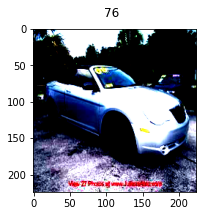

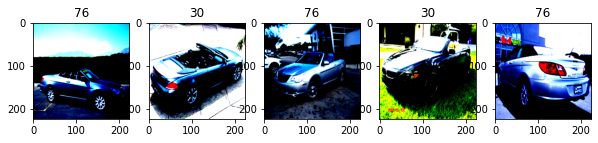

In [ ]:
%%script echo skipping
rnd_idx = random.randrange(len(testset))
print(rnd_idx)
test_image_1, candidates_idx = res[rnd_idx]
print(candidates_idx)
plot_result(test_image_1, candidates_idx, testset[rnd_idx][1])

## Run test

Test acc: 0.7158313642581768


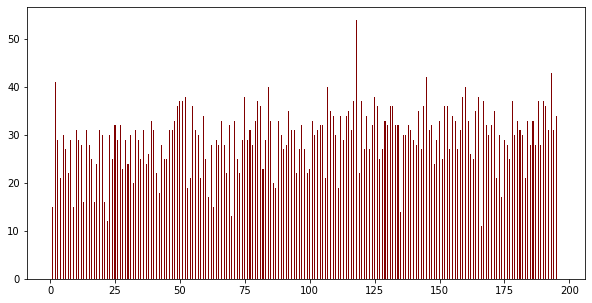

In [ ]:
%%script echo skipping
y_pred, y_true = run_test()

### F1 score

In [ ]:
%%script echo skipping
f1_score(y_true, y_pred, average='macro')

0.7163116303838053

### Recall score

In [ ]:
%%script echo skipping
recall_score(y_true, y_pred, average='macro')

0.7174012234243611

### Precision score

In [ ]:
%%script echo skipping
precision_score(y_true, y_pred, average='macro')

0.737614248850672

## Save model

In [ ]:
%%script echo skipping
import pickle
from google.colab import drive
drive.mount('/content/drive')

saved_model = pickle.dumps(knn)
path = '/content/drive/My Drive/outputs/dl_Transfered_embedding.txt'
with open(path, 'wb') as binary_file:
  binary_file.write(saved_model)
# print(type(saved_model))
# knn_from_pickle = pickle.loads(saved_model)

Mounted at /content/drive


# Test enviroment

## Single image prediction

In [ ]:
import pickle
from google.colab import files
from google.colab import drive
from PIL import Image
!gdown --id 16gvgIADY1eQKV2TYCrU4LJ3ager1zpAB

path = 'dl_Transfered_embedding.txt'

in_file = open(path, "rb")
data = in_file.read()
in_file.close()
knn_from_pickle = pickle.loads(data)
print(knn_from_pickle)

uploaded = files.upload()
image = Image.open(list(uploaded.keys())[0])
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((224, 224, ))
])

img_tensor = transform(image)

/usr/local/lib/python3.9/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=16gvgIADY1eQKV2TYCrU4LJ3ager1zpAB
To: /content/dl_Transfered_embedding.txt
100% 6.39M/6.39M [00:00<00:00, 59.1MB/s]
NearestNeighbors(metric='cosine')


Saving benz.jpg to benz.jpg


## Visualize image

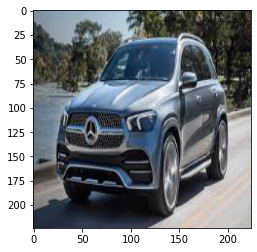

In [ ]:
plt.imshow(img_tensor.permute(1,2,0), cmap='gray')
plt.show()

## prediction

In [ ]:
predict_one(img_tensor.unsqueeze(0),net,knn_from_pickle)

predicted:  24
